<a href="https://colab.research.google.com/github/sadamhabnawi28/Exoplanet/blob/main/Exoplanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/Astronomy data/Exoplanet_data/'

In [ ]:
df_con=pd.read_csv(path+'exoplanet_confirmed.csv')
df_can=pd.read_csv(path+'exoplanet_candidate.csv')
df_oth=pd.read_csv(path+'exoplanet_other.csv')

In [ ]:
df0= pd.concat([df_con,df_can], ignore_index=True)
df = pd.concat([df0,df_oth],ignore_index=True)

#Data Preprocessing and EDA

In [ ]:
df.head()

,name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,109 Psc b,Confirmed,6.8370,0.53200,0.53200,6.3830,0.07800,0.07800,1.152,NaN,...,G5 IV,6.90,0.60,0.60,5600.0,80.0,80.0,NaN,NaN,HD 10697
1,11 Com b,Confirmed,16.1284,1.53491,1.53491,16.1284,1.53491,1.53491,NaN,NaN,...,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
2,11 UMi b,Confirmed,11.0873,1.10000,1.10000,11.0873,1.10000,1.10000,NaN,NaN,...,K4III,1.56,0.54,0.54,4340.0,70.0,70.0,NaN,NaN,NaN
3,14 And b,Confirmed,4.6840,0.23000,0.23000,4.6840,0.23000,0.23000,NaN,NaN,...,K0III,NaN,NaN,NaN,4813.0,20.0,20.0,NaN,NaN,NaN
4,14 Her b,Confirmed,NaN,NaN,NaN,NaN,4.95000,4.95000,NaN,NaN,...,K0 V,5.10,NaN,NaN,5311.0,87.0,87.0,NaN,NaN,NaN


In [ ]:
df.shape

(8544, 98)

In [ ]:
#Drop unnecessary columns
df = df.drop(columns=['planet_status','name','star_sp_type','mag_i','mass_sini','alternate_names','mass_error_min','mass_error_max','mass_sini_error_min','mass_sini_error_max','radius_error_min','radius_error_max','orbital_period_error_min','orbital_period_error_max','semi_major_axis_error_min','semi_major_axis_error_max','eccentricity_error_min','eccentricity_error_max','inclination_error_min','inclination_error_max','molecules','discovered','tzero_tr_sec','tzero_tr_sec_error_min','tzero_tr_sec_error_max','lambda_angle','lambda_angle_error_min','lambda_angle_error_max','tzero_vr','tzero_vr_error_max','tzero_vr_error_min','temp_measured','hot_point_lon','geometric_albedo','geometric_albedo_error_min','geometric_albedo_error_max','log_g','star_magnetic_field'])
df=df.drop(columns=['star_name','inclination','tzero_tr','mag_v','mag_k','mag_h','mag_j','omega','k','star_alternate_names','updated','angular_distance','omega_error_min','omega_error_max','tperi_error_min','tperi_error_max','tperi','tconj_error_min','tconj_error_max','tconj','tzero_tr_error_min','tzero_tr_error_max','impact_parameter_error_min','impact_parameter_error_max','k_error_min','k_error_max','temp_calculated_error_min','temp_calculated_error_max','star_distance_error_min','star_distance_error_max','star_metallicity_error_min','star_metallicity_error_max','star_mass_error_min','star_mass_error_max','star_radius_error_min','star_radius_error_max','star_age_error_min','star_age_error_max','star_teff_error_min','star_teff_error_max','star_detected_disc'])

In [ ]:
#Rename columns to write down the units
df=df.rename(columns={'mass':'mass_Mjup','radius':'radius_Rjup','orbital_period':'orbital_period_days','semi_major_axis':'semi_major_axis_au','temp_calculated':'tempK_calculated','star_distance':'star_distance_pc','star_mass':'star_mass_Msun','star_radius':'star_radius_Rsun','star_age':'star_age_Gy','star_teff':'star_teffK'})

In [ ]:
df.radius_Rjup[df.radius_Rjup==0] = df.radius_Rjup.mode()

<ipython-input-150-15f3e16fbcba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.radius_Rjup[df.radius_Rjup==0] = df.radius_Rjup.mode()


In [ ]:
df.radius_detection_type = df.radius_detection_type.fillna('Other')

In [ ]:
df.radius_detection_type.value_counts()

radius_detection_type
Other              6983
Primary Transit    1431
Theoretical          82
Flux                 48
Name: count, dtype: int64

In [ ]:
df.mass_detection_type=df.mass_detection_type.fillna('Other')

In [ ]:
df.mass_detection_type.value_counts()

mass_detection_type
Other              6054
Radial Velocity    1545
Spectrum            261
Microlensing        232
Theoretical         231
TTV                  94
Astrometry           89
Timing               38
Name: count, dtype: int64

In [ ]:
print(df.publication.unique())
print(df.detection_type.unique())
print(df.mass_detection_type.unique())
print(df.radius_detection_type.unique())

['Published in a refereed paper' 'Submitted to a professional journal'
 'Announced on a professional conference' 'Announced on a website']
['Radial Velocity' 'Imaging' 'Primary Transit' 'Astrometry'
 'Timing, Kinematic' 'Other' 'TTV' 'Microlensing' 'Timing'
 'Radial Velocity, Astrometry' 'Radial Velocity, Primary Transit'
 'Primary Transit, Radial Velocity' 'Other, Imaging, Kinematic'
 'Kinematic']
['Radial Velocity' 'Astrometry' 'Spectrum' 'Other' 'Theoretical' 'Timing'
 'TTV' 'Microlensing']
['Theoretical' 'Other' 'Primary Transit' 'Flux']


In [ ]:
df.eccentricity = df.eccentricity.fillna(0).astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8544 entries, 0 to 8543
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mass_Mjup              3621 non-null   float64
 1   radius_Rjup            6425 non-null   float64
 2   orbital_period_days    7913 non-null   float64
 3   semi_major_axis_au     6346 non-null   float64
 4   eccentricity           8544 non-null   float64
 5   impact_parameter       4212 non-null   float64
 6   tempK_calculated       3583 non-null   float64
 7   publication            8544 non-null   object 
 8   detection_type         8544 non-null   object 
 9   mass_detection_type    8544 non-null   object 
 10  radius_detection_type  8544 non-null   object 
 11  ra                     8542 non-null   float64
 12  dec                    8542 non-null   float64
 13  star_distance_pc       5798 non-null   float64
 14  star_metallicity       6869 non-null   float64
 15  star

In [ ]:
df.describe()

,mass_Mjup,radius_Rjup,orbital_period_days,semi_major_axis_au,eccentricity,impact_parameter,tempK_calculated,ra,dec,star_distance_pc,star_metallicity,star_mass_Msun,star_radius_Rsun,star_age_Gy,star_teffK
count,3621.000000,6.425000e+03,7.913000e+03,6346.000000,8544.000000,4212.000000,3583.000000,8542.000000,8542.000000,5798.000000,6869.000000,7672.000000,7149.000000,3186.000000,7384.000000
mean,10.641253,5.272742e+00,2.080627e+03,17.971822,0.054401,0.979895,933.321663,243.569477,22.438962,813.011784,0.739434,0.959170,1.573801,4.220170,5564.936022
std,38.699861,8.665801e+01,9.400065e+04,258.576125,0.140811,5.983072,629.572047,86.685166,34.826328,8882.025233,66.495401,0.456664,4.258284,2.624924,2801.519021
min,0.000002,6.200000e-12,1.250000e-02,0.000015,0.000000,-0.629000,25.000000,0.000000,-88.121111,1.295000,-2.090000,0.011000,0.000020,0.000020,575.000000
25%,0.051000,1.330000e-01,4.514366e+00,0.055000,0.000000,0.180000,516.000000,208.036875,-0.893820,77.245000,-0.180000,0.787450,0.790000,2.510000,5039.000000
50%,0.870000,2.130000e-01,1.277000e+01,0.117500,0.000000,0.390000,798.000000,287.535030,40.669407,333.795000,-0.030000,0.950000,0.964000,4.070000,5627.000000
75%,5.400000,6.210000e-01,5.647542e+01,0.548500,0.000195,0.694525,1204.500000,294.286455,45.676984,801.760000,0.070000,1.091000,1.250000,5.125000,6007.000000
max,690.000000,4.332120e+03,8.035500e+06,9900.000000,3.155000,98.041400,14225.000000,359.975000,85.736111,670000.000000,5511.000000,20.000000,149.058000,15.000000,200000.000000


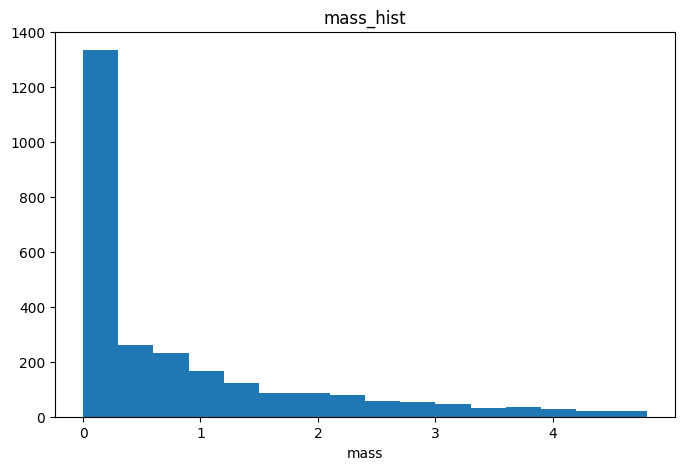

In [ ]:
bins=np.arange(0,5,0.3)
ticks=np.arange(0,5,1)
fig=plt.figure(figsize=(8,5))
plt.hist(df.mass_Mjup, bins=bins)
plt.xticks(ticks)
plt.title('mass_hist')
plt.xlabel('mass')
plt.show()

In [ ]:
print('mean : ', df.mass_Mjup.mean())
print('stdev : ', df.mass_Mjup.std())
print('skewness : ',df.mass_Mjup.skew())

mean :  10.641252903445555
stdev :  38.69986129103472
skewness :  8.638628511514376


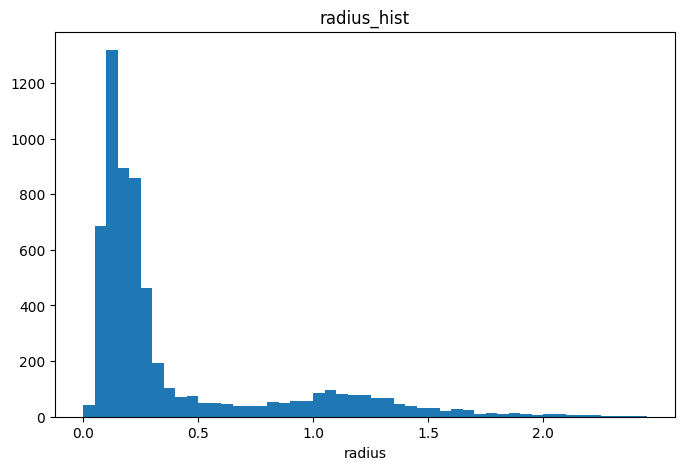

In [ ]:
bins=np.arange(0,2.5,0.05)
ticks=np.arange(0,2.5,0.5)
fig=plt.figure(figsize=(8,5))
plt.hist(df.radius_Rjup, bins=bins)
plt.xticks(ticks)
plt.title('radius_hist')
plt.xlabel('radius')
plt.show()

In [ ]:
print('mean : ', df.radius_Rjup.mean())
print('stdev : ', df.radius_Rjup.std() )
print('skewness : ', df.radius_Rjup.skew())

mean :  5.27274182668162
stdev :  86.6580135126384
skewness :  31.3295219848111


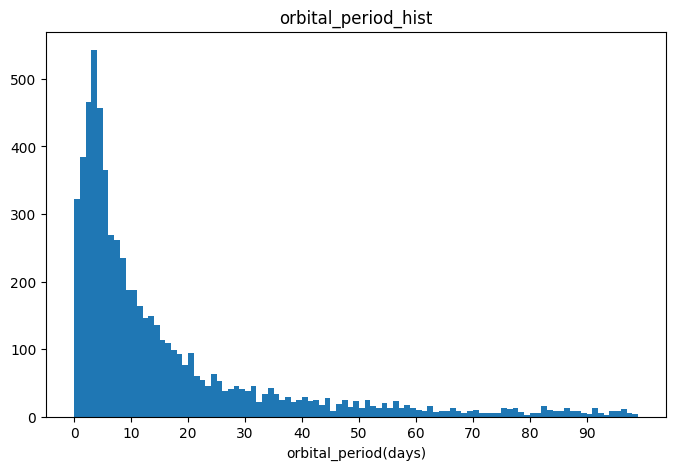

In [ ]:
bins=np.arange(0,100,1)
ticks=np.arange(0,100,10)
fig=plt.figure(figsize=(8,5))
plt.hist(df.orbital_period_days, bins=bins)
plt.xticks(ticks)
plt.title('orbital_period_hist')
plt.xlabel('orbital_period(days)')
plt.show()

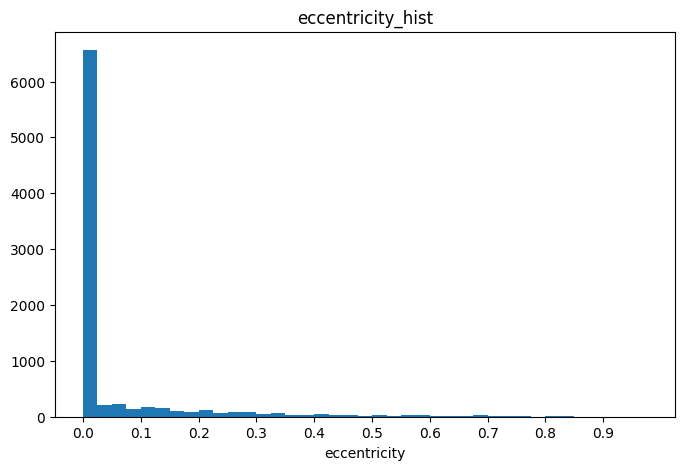

In [ ]:
bins=np.arange(0,1,0.025)
ticks=np.arange(0,1,0.1)
fig=plt.figure(figsize=(8,5))
plt.hist(df.eccentricity, bins=bins)
plt.xticks(ticks)
plt.title('eccentricity_hist')
plt.xlabel('eccentricity')
plt.show()

In [ ]:
print('mean : ', df.eccentricity.mean())
print('stdev : ', df.eccentricity.std() )
print('skewness : ', df.eccentricity.skew())

mean :  0.05440072054873474
stdev :  0.14081107946105528
skewness :  4.631854555544267


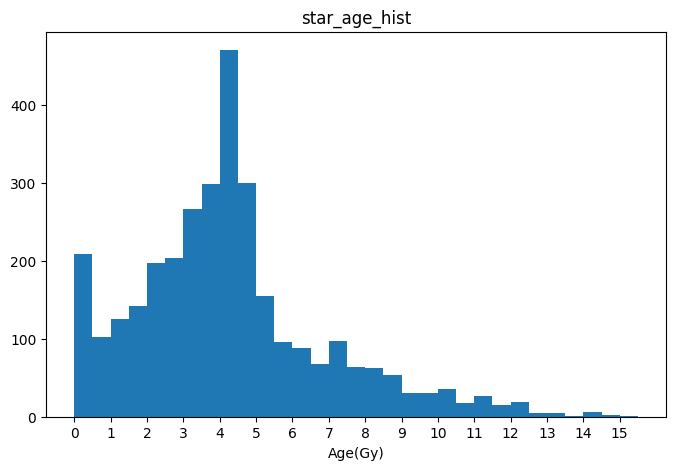

In [ ]:
bins=np.arange(0,16,0.5)
ticks=np.arange(0,16,1)
fig=plt.figure(figsize=(8,5))
plt.hist(df.star_age_Gy, bins=bins)
plt.xticks(ticks)
plt.title('star_age_hist')
plt.xlabel('Age(Gy)')
plt.show()

In [ ]:
print('mean : ', df.star_age_Gy.mean())
print('stdev : ', df.star_age_Gy.std() )
print('skewness : ', df.star_age_Gy.skew())

mean :  4.220170320150659
stdev :  2.6249240372497713
skewness :  0.8869700952796008
